# BDA 507 - Introduction to Computer Programming (Python) 

## Term Project - 06.01.2020

Nilay Kamar
**Student ID**: 311902021
**Email**: kamarn@mef.edu.tr

# Zomato Data Analysis | Caddebostan vs. Nisantasi, Istanbul, Turkey 

Zomato is an application-based platform to find the best restaurant, cafe, and bar in a specific city. Their vision is better food for more people and they aim that connect people to food in every context but work closely with restaurants to enable a sustainable ecosystem. People can review and rate restaurants where they go to. Also, restaurants share their specific features such as payment types, gluten-free options, pet-friendly, no alcohol available, etc. 

In this project, I examined whether a significant difference in food price and restaurant preferences between Nişantaşı and Caddebostan. They are expensive and popular subzones in Istanbul. Also, I wonder where people like to go at Caddebostan and Nişantaşı, how their rates are, and which features attract the people through there.

For that, I used an API. Zomato shares their data with an [API](https://developers.zomato.com/api) and you can easily access restaurant data in a given city, subzone, or country after getting an API key. I got data about restaurants and their highlights of Caddebostan which is a popular subzone in Istanbul.

### Loading Libraries and data

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=False)

In [2]:
res_df = pd.read_excel(r'/Users/nilaykamar/PycharmProjects/Term_Project/restaurants.xlsx') #restaurant data

In [3]:
high_df = pd.read_excel(r'/Users/nilaykamar/PycharmProjects/Term_Project/highlights.xlsx') #restaurant's highlights data

In [4]:
cuisines_df = pd.read_excel(r'/Users/nilaykamar/PycharmProjects/Term_Project/cuisines.xlsx') #cuisines data

In [5]:
foodie_df = pd.read_excel(r'/Users/nilaykamar/PycharmProjects/Term_Project/foodie_level.xlsx') #foodie level data

### Getting basic ideas

In [6]:
print("Restaurant dataset contains {} rows and {} columns".format(res_df.shape[0],res_df.shape[1]))
print("Highlight dataset contains {} rows and {} columns".format(high_df.shape[0],high_df.shape[1]))
print("Cuisines dataset contains {} rows and {} columns".format(cuisines_df.shape[0],cuisines_df.shape[1]))
print("Foodie level dataset contains {} rows and {} columns".format(foodie_df.shape[0],foodie_df.shape[1]))

Restaurant dataset contains 200 rows and 17 columns
Highlight dataset contains 3004 rows and 4 columns
Cuisines dataset contains 396 rows and 4 columns
Foodie level dataset contains 1884 rows and 4 columns


In [7]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
res_id                  200 non-null int64
name                    200 non-null object
locality                200 non-null object
latitude                200 non-null float64
longitude               200 non-null float64
establishment           200 non-null object
all_reviews_count       200 non-null int64
aggregate_rating        200 non-null float64
rating_text             200 non-null object
rating_color            200 non-null object
votes                   200 non-null int64
photo_count             200 non-null int64
average_cost_for_two    200 non-null int64
price_range             200 non-null int64
cuisines                200 non-null object
highlights              200 non-null object
foodie_level            200 non-null object
dtypes: float64(3), int64(6), object(8)
memory usage: 26.7+ KB


In [8]:
high_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 4 columns):
Unnamed: 0    3004 non-null int64
res_id        3004 non-null int64
locality      3004 non-null object
highlight     2906 non-null object
dtypes: int64(2), object(2)
memory usage: 94.0+ KB


In [9]:
cuisines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 4 columns):
Unnamed: 0    396 non-null int64
res_id        396 non-null int64
locality      396 non-null object
cuisine       396 non-null object
dtypes: int64(2), object(2)
memory usage: 12.5+ KB


In [10]:
foodie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 4 columns):
Unnamed: 0      1884 non-null int64
res_id          1884 non-null int64
locality        1884 non-null object
foodie_level    1871 non-null object
dtypes: int64(2), object(2)
memory usage: 59.0+ KB


Since there are data frames about cuisines, highlights, and foodie_level, these columns can be discarded.

In [11]:
res_df = res_df.drop(['cuisines', 'highlights', 'foodie_level', 'price_range'], axis=1)
res_df.head(5)

res_id                                  name   locality   latitude  \
0  17975067                              Kruvasan  Nişantaşı  41.049968   
1  18253001  Çeşme Bazlama Kahvaltı - Nişantaşı 1  Nişantaşı  41.049264   
2  18135204             Hümaliva Çikolata & Kahve  Nişantaşı  41.053077   
3  19257791                                 Gasto  Nişantaşı  41.049260   
4   5902693                              Ranchero  Nişantaşı  41.047766   

   longitude    establishment  all_reviews_count  aggregate_rating  \
0  28.995746             Café                249               4.6   
1  28.994848    Casual Dining                554               4.6   
2  28.993801  Dessert Parlour                227               4.5   
3  28.996031    Casual Dining                 36               4.1   
4  28.993704    Casual Dining                347               4.5   

  rating_text rating_color  votes  photo_count  average_cost_for_two  
0   Excellent       3F7E00    533          313                    90  
1   Excellent       3F7E00   1405          457                   140  
2   Excellent       3F7E00    435          318                    70  
3   Very Good       5BA829     41           57                   140  
4   Excellent       3F7E00    676          463                   240

In [12]:
high_df = high_df.drop(['Unnamed: 0'], axis=1)
cuisines_df = cuisines_df.drop(['Unnamed: 0'], axis=1)
foodie_df = foodie_df.drop(['Unnamed: 0'], axis=1)

Foodie level data and highlight data contain missing values. Because this means no highlight or foodie post, they can be discarded.

In [13]:
print(high_df.isnull().sum())
print(foodie_df.isnull().sum())

res_id        0
locality      0
highlight    98
dtype: int64
res_id           0
locality         0
foodie_level    13
dtype: int64


In [14]:
high_df = high_df.dropna() 
high_df.count()

res_id       2906
locality     2906
highlight    2906
dtype: int64

In [15]:
foodie_df = foodie_df.dropna()
foodie_df.count()

res_id          1871
locality        1871
foodie_level    1871
dtype: int64

In [16]:
high_df.head()

res_id   locality           highlight
0  17975067  Nişantaşı         Credit Card
1  17975067  Nişantaşı          Debit Card
2  17975067  Nişantaşı               Lunch
3  17975067  Nişantaşı  Takeaway Available
4  17975067  Nişantaşı           Breakfast

In [17]:
cuisines_df.head()

res_id   locality          cuisine
0  17975067  Nişantaşı  Restaurant Cafe
1  18253001  Nişantaşı          Turkish
2  18253001  Nişantaşı             Cafe
3  18135204  Nişantaşı         Desserts
4  18135204  Nişantaşı             Cafe

In [18]:
foodie_df.head()

res_id   locality  foodie_level
0  17975067  Nişantaşı    Big Foodie
1  17975067  Nişantaşı    Big Foodie
2  17975067  Nişantaşı        Foodie
3  17975067  Nişantaşı   Connoisseur
4  17975067  Nişantaşı  Super Foodie

#### Column Description

Restaurant dataset:
 
 - **res_id**: a unique id of restaurants
 - **name**: restaurant name
 - **locality**: subzone name of restaurants
 - **latitude**: latitude of restaurant's location
 - **longitude**: longitude of restaurant's location
 - **establishment**: restaurant types
 - **all_reviews_count**: count of reviews
 - **aggregate_rating**: average ratings of restaurants
 - **rating_text**: text which equaled to rating according to Zomato
 - **rating_color**: color which equaled to rating according to Zomato
 - **votes**: number of votes to given restaurant
 - **photo_count**: number of photos posted on given restaurants
 - **average_cost_for_two**: average price of given restaurants for two people
 
Highlight dataset:

 - **res_id**: a unique id of restaurants
 - **locality**: subzone name of restaurants
 - **highlight**: features that restaurants give customers
 
Cuisines dataset:

 - **res_id**: a unique id of restaurants
 - **locality**: subzone name of restaurants
 - **cuisines**: cuisines of restaurants
 
Foodie level dataset:

 - **res_id**: a unique id of restaurants
 - **locality**: subzone name of restaurants
 - **foodie_level**: level which equaled to foodie according to Zomato *foodie: users of Zomato*

#### Outlier Detection

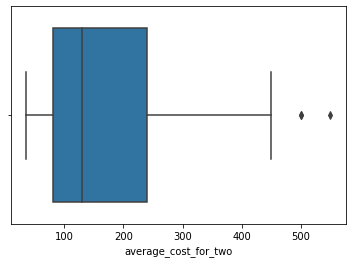

In [19]:
sns.boxplot(x=res_df['average_cost_for_two'])

There is no outlier in average price.

## Explatory Data Analysis

### Common restaurant types in Istanbul? 

Text(0.5, 0, 'Number of restaurants')

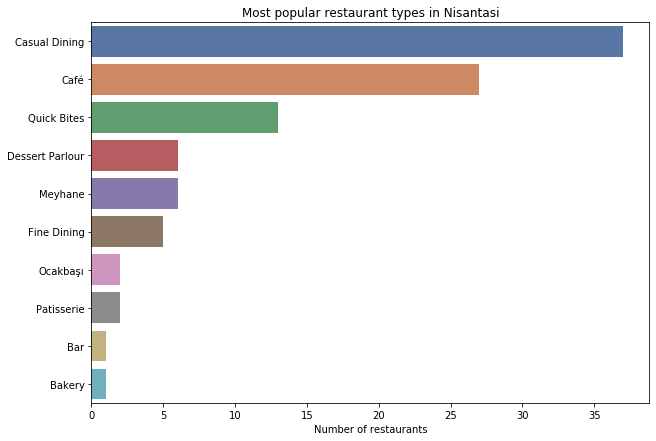

In [20]:
plt.figure(figsize=(10,7))
types=res_df[res_df['locality'] == 'Nişantaşı']['establishment'].value_counts()[:100]

sns.barplot(x=types, y=types.index, palette='deep')
plt.title("Most popular restaurant types in Nisantasi")
plt.xlabel("Number of restaurants")

Text(0.5, 0, 'Number of restaurants')

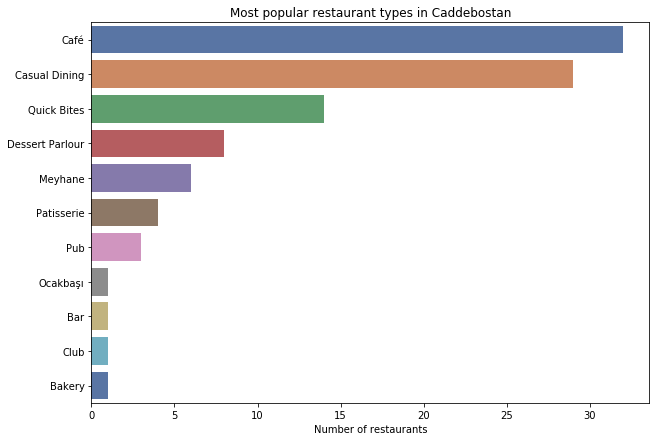

In [21]:
plt.figure(figsize=(10,7))
types=res_df[res_df['locality'] == 'Caddebostan']['establishment'].value_counts()[:20]

sns.barplot(x=types, y=types.index, palette='deep')
plt.title("Most popular restaurant types in Caddebostan")
plt.xlabel("Number of restaurants")

As it can be shown graphs above, Cafe's are popular restaurant types in both Caddebostan and Nişantaşı. Fine dining restaurants seems to have rising trend at Nisantasi.

### Highlights of restaurants

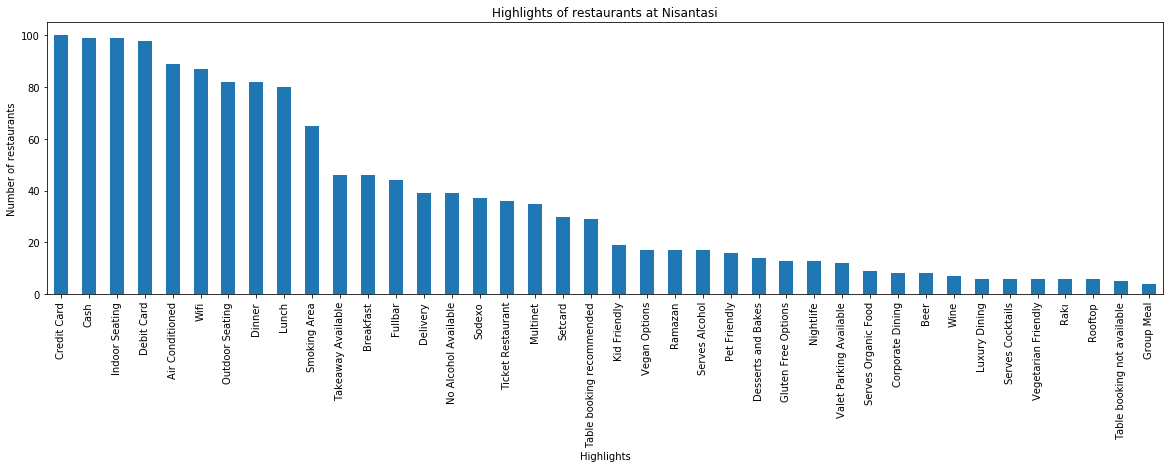

In [22]:
high_df[high_df['locality'] == 'Nişantaşı'].highlight.value_counts().nlargest(40).plot(kind='bar', figsize=(20,5))
plt.title("Highlights of restaurants at Nisantasi")
plt.ylabel('Number of restaurants')
plt.xlabel('Highlights');

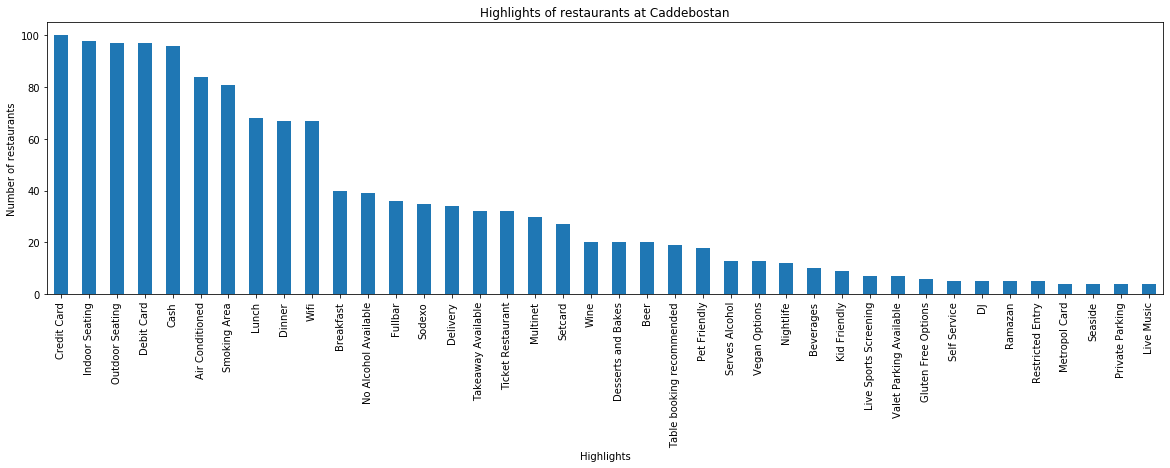

In [23]:
high_df[high_df['locality'] == 'Caddebostan'].highlight.value_counts().nlargest(40).plot(kind='bar', figsize=(20,5))
plt.title("Highlights of restaurants at Caddebostan")
plt.ylabel('Number of restaurants')
plt.xlabel('Highlights');

Restaurants have similar features at both Caddebostan and Nisantasi. Interestingly, popular eating trends were started to enter among desirable features such as gluten-free options and organic food serves, etc. According to limited data about people's prefers, people care about smoking at Caddebostan less than Nisantasi.

### Average cost for two person

Text(0.5, 0, 'Average cost for two people')

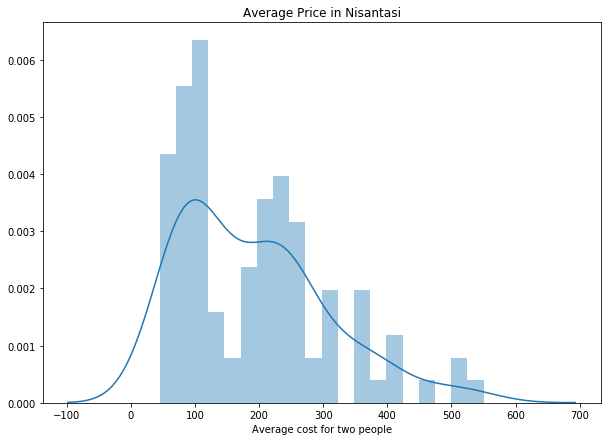

In [24]:
plt.figure(figsize=(10,7))
rating=res_df[res_df['locality'] == 'Nişantaşı']['average_cost_for_two']
sns.distplot(rating,bins=20)
plt.title("Average Price in Nisantasi")
plt.xlabel("Average cost for two people")

Text(0.5, 0, 'Average cost for two people')

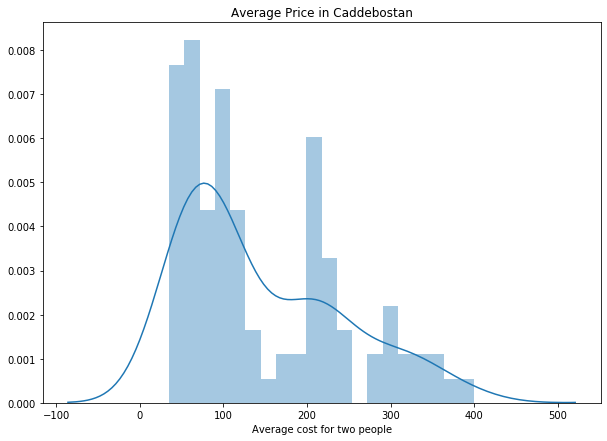

In [25]:
plt.figure(figsize=(10,7))
rating=res_df[res_df['locality'] == 'Caddebostan']['average_cost_for_two']
sns.distplot(rating,bins=20)
plt.title("Average Price in Caddebostan")
plt.xlabel("Average cost for two people")

According to graphs above, Nisantasi seems to have higher price than Caddebostan.

### Rating distribution

Text(0.5, 0, 'Average Rating')

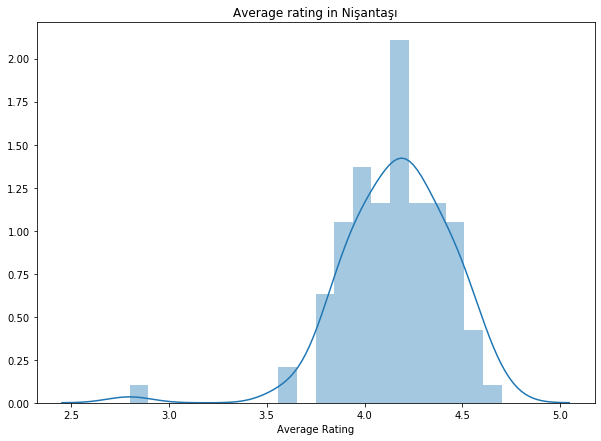

In [26]:
plt.figure(figsize=(10,7))
rating=res_df[res_df['locality'] == 'Nişantaşı']['aggregate_rating']
sns.distplot(rating, bins=20)
plt.title("Average rating in Nişantaşı")
plt.xlabel("Average Rating")

Text(0.5, 0, 'Average Rating')

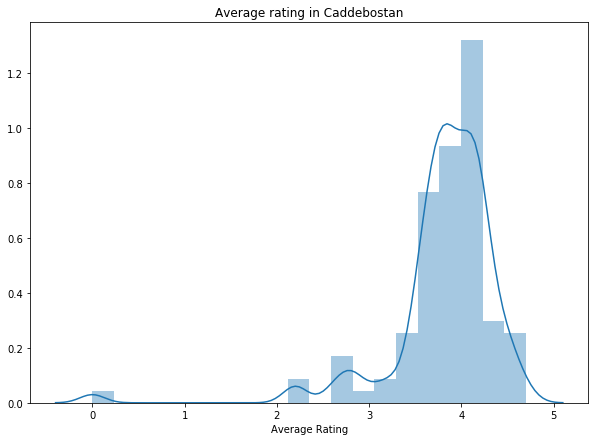

In [27]:
plt.figure(figsize=(10,7))
rating=res_df[res_df['locality'] == 'Caddebostan']['aggregate_rating']
sns.distplot(rating,bins=20)
plt.title("Average rating in Caddebostan")
plt.xlabel("Average Rating")

Nisantası and Caddebostan nearly have the same average ratings range.
Restaurants have ratings more than 4.5 are rare.

### Average price vs. average rating

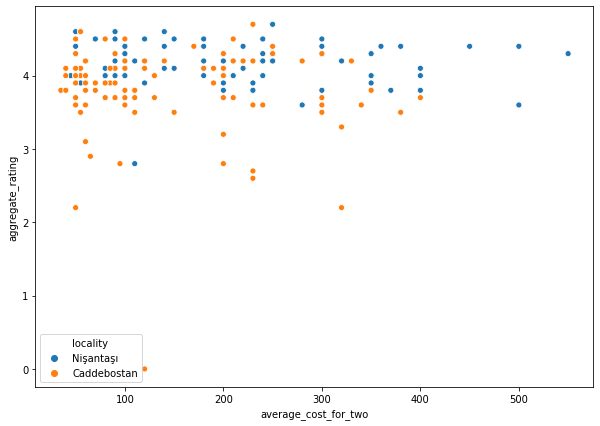

In [28]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="average_cost_for_two",y='aggregate_rating', hue='locality', data=res_df)
plt.show()

### Average price vs. Establishments

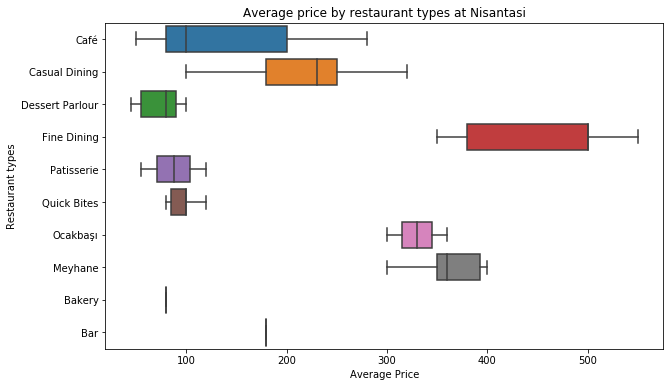

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(res_df[res_df['locality'] == 'Nişantaşı']['average_cost_for_two'], res_df[res_df['locality'] == 'Nişantaşı']['establishment'], showfliers=False)

plt.title("Average price by restaurant types at Nisantasi")
ax.set_xlabel('Average Price')
ax.set_ylabel('Restaurant types')
plt.show()

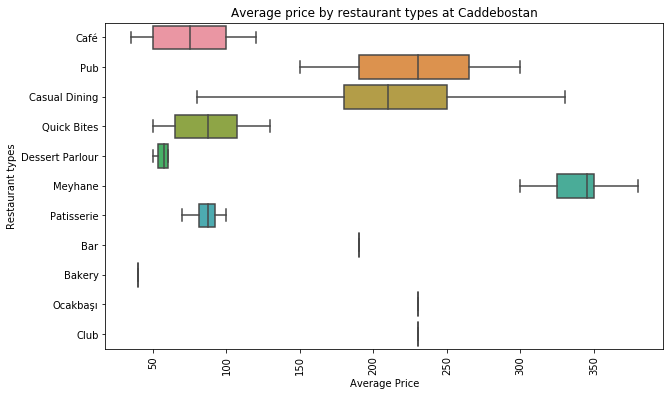

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(res_df[res_df['locality'] == 'Caddebostan']['average_cost_for_two'], res_df[res_df['locality'] == 'Caddebostan']['establishment'], showfliers=False)
plt.xticks(rotation=90)

plt.title("Average price by restaurant types at Caddebostan")
ax.set_xlabel('Average Price')
ax.set_ylabel('Restaurant types')
plt.show()

- It seems that restaurants which their types are Cafe have higher price at Nisantası than Caddebostan.
- While 'meyhane's are the most expensive restaurant types in Caddebostan, this rank is belong to fine dining restaurants at Nisantasi.

### Average rating

Text(0, 0.5, 'count')

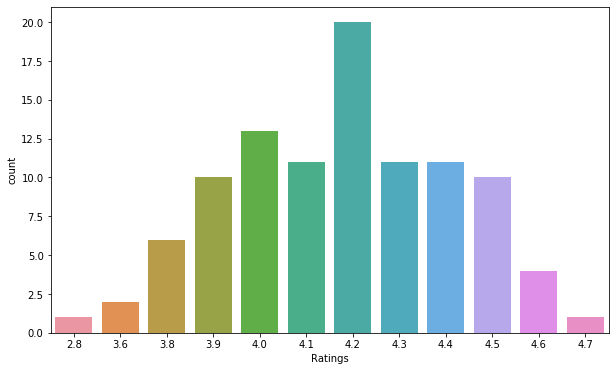

In [31]:
plt.figure(figsize=(10,6))
rating=res_df[res_df['locality'] == 'Nişantaşı']['aggregate_rating'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('count')

Text(0, 0.5, 'count')

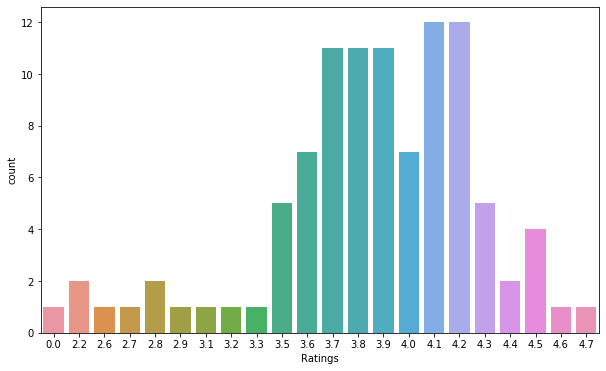

In [32]:
plt.figure(figsize=(10,6))
rating=res_df[res_df['locality'] == 'Caddebostan']['aggregate_rating'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('count')

### Cuisines distribution

Text(0.5, 1.0, 'Most popular cuisines of Nisantasi')

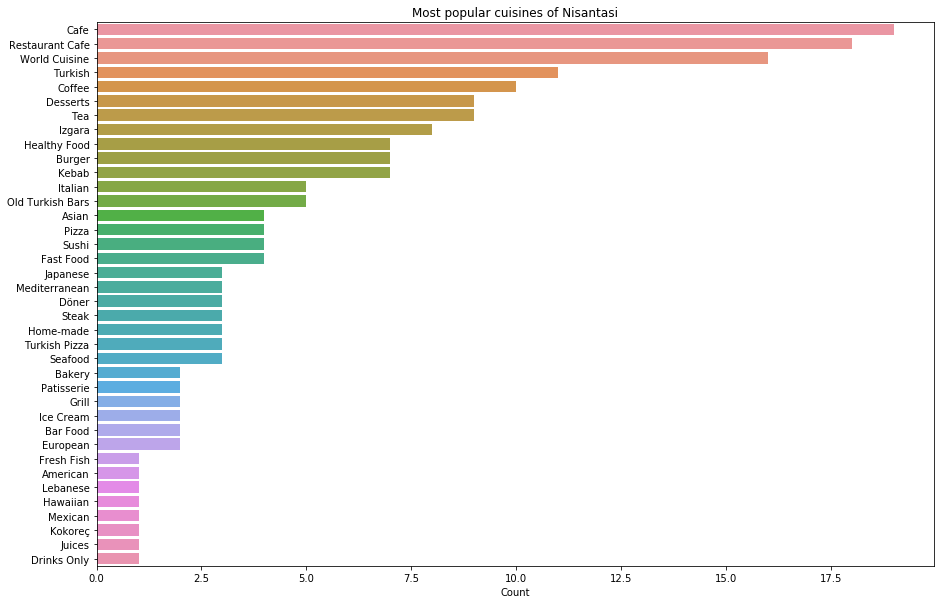

In [33]:
plt.figure(figsize=(15,10))
cuisines=cuisines_df[cuisines_df['locality'] == 'Nişantaşı']['cuisine'].value_counts()
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Nisantasi")

Text(0.5, 1.0, 'Most popular cuisines of Caddebostan')

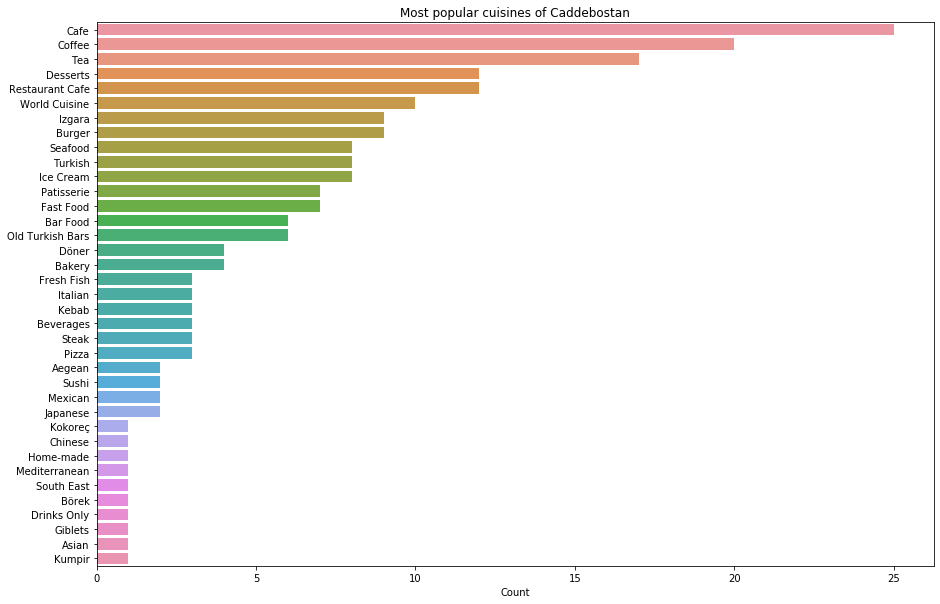

In [34]:
plt.figure(figsize=(15,10))
cuisines=cuisines_df[cuisines_df['locality'] == 'Caddebostan']['cuisine'].value_counts()
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Caddebostan")

### Correlation matrix

A correlation matrix is a table showing the value of the correlation coefficient (Correlation coefficients are used in statistics to measure how strong a relationship is between two variables.) between sets of variables. Each attribute of the dataset is compared with the other attributes to find out the correlation coefficient. This analysis allows us to see which pairs have the highest correlation, the pairs which are highly correlated represent the same variance of the dataset thus we can further analyze them to understand which attribute among the pairs are most significant for building the model.

res_id  latitude  longitude  all_reviews_count  \
res_id                1.000000  0.053188  -0.031300          -0.420487   
latitude              0.053188  1.000000  -0.628794          -0.019541   
longitude            -0.031300 -0.628794   1.000000           0.112549   
all_reviews_count    -0.420487 -0.019541   0.112549           1.000000   
aggregate_rating     -0.243600  0.211799   0.041177           0.358746   
votes                -0.376575 -0.056121   0.162975           0.829346   
photo_count          -0.416973  0.073805   0.062141           0.759865   
average_cost_for_two -0.093978 -0.221430  -0.014895           0.215983   

                      aggregate_rating     votes  photo_count  \
res_id                       -0.243600 -0.376575    -0.416973   
latitude                      0.211799 -0.056121     0.073805   
longitude                     0.041177  0.162975     0.062141   
all_reviews_count             0.358746  0.829346     0.759865   
aggregate_rating              1.000000  0.426253     0.433194   
votes                         0.426253  1.000000     0.826853   
photo_count                   0.433194  0.826853     1.000000   
average_cost_for_two         -0.068798  0.229705     0.196629   

                      average_cost_for_two  
res_id                           -0.093978  
latitude                         -0.221430  
longitude                        -0.014895  
all_reviews_count                 0.215983  
aggregate_rating                 -0.068798  
votes                             0.229705  
photo_count                       0.196629  
average_cost_for_two              1.000000

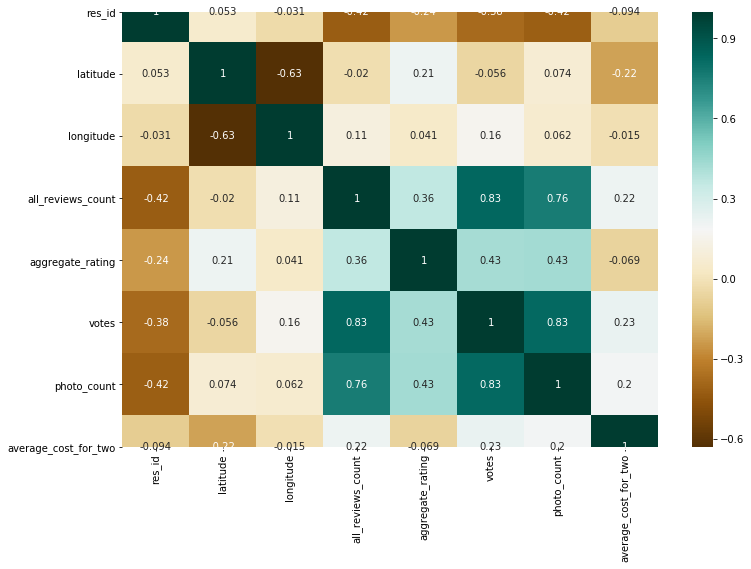

In [35]:
plt.figure(figsize=(12,8))
c= res_df[res_df['locality'] == 'Caddebostan'].corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

res_id  latitude  longitude  all_reviews_count  \
res_id                1.000000 -0.002462   0.267222          -0.259131   
latitude             -0.002462  1.000000  -0.149477          -0.139476   
longitude             0.267222 -0.149477   1.000000          -0.154392   
all_reviews_count    -0.259131 -0.139476  -0.154392           1.000000   
aggregate_rating     -0.043617 -0.135747   0.220628           0.267484   
votes                -0.228527 -0.170350  -0.094754           0.956648   
photo_count          -0.312786 -0.147637  -0.151429           0.891403   
average_cost_for_two -0.051806 -0.303302  -0.028672          -0.020670   

                      aggregate_rating     votes  photo_count  \
res_id                       -0.043617 -0.228527    -0.312786   
latitude                     -0.135747 -0.170350    -0.147637   
longitude                     0.220628 -0.094754    -0.151429   
all_reviews_count             0.267484  0.956648     0.891403   
aggregate_rating              1.000000  0.337548     0.299892   
votes                         0.337548  1.000000     0.837810   
photo_count                   0.299892  0.837810     1.000000   
average_cost_for_two         -0.052736  0.026615     0.008023   

                      average_cost_for_two  
res_id                           -0.051806  
latitude                         -0.303302  
longitude                        -0.028672  
all_reviews_count                -0.020670  
aggregate_rating                 -0.052736  
votes                             0.026615  
photo_count                       0.008023  
average_cost_for_two              1.000000

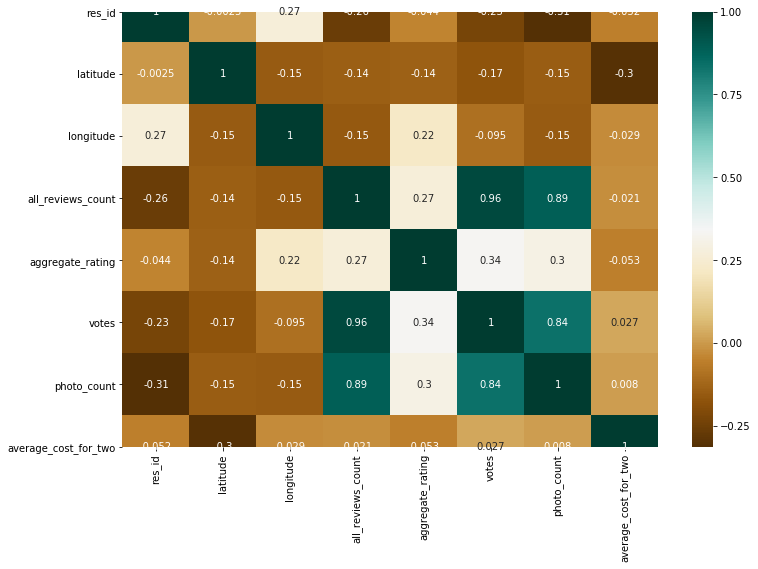

In [36]:
plt.figure(figsize=(12,8))
c= res_df[res_df['locality'] == 'Nişantaşı'].corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

According to the correlation matrixes above, there is a strong relationship between revies, votes, and posting photos. Hence, this relationship is stronger at Caddebostan than Nisantasi.

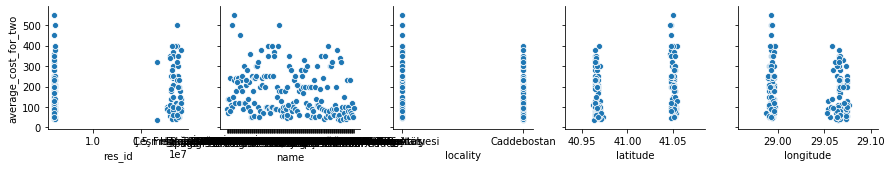

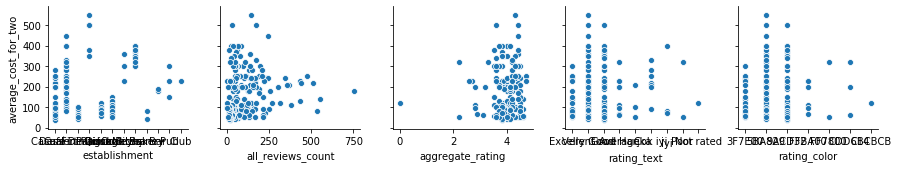

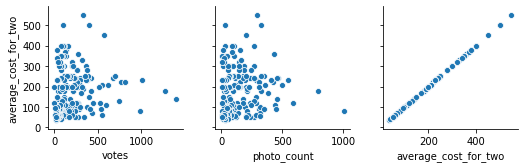

In [37]:
for i in range(0, len(res_df.columns), 5):
    sns.pairplot(data=res_df,
                x_vars=res_df.columns[i:i+5],
                y_vars=['average_cost_for_two'])

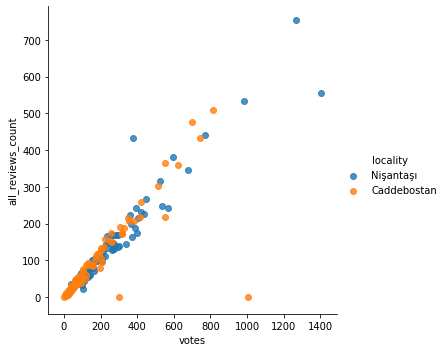

In [38]:
sns.lmplot(x="votes", y="all_reviews_count", data=res_df, fit_reg=False, hue="locality")

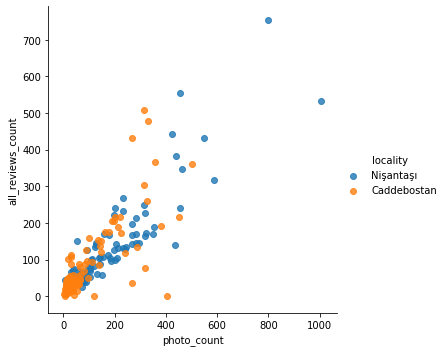

In [39]:
sns.lmplot(x="photo_count", y="all_reviews_count", data=res_df, fit_reg=False, hue="locality")

### Foodie levels

In [40]:
x=foodie_df[foodie_df['locality'] == 'Nişantaşı']['foodie_level'].value_counts()
colors = ['#FEBFB3', '#E1396C']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
             marker=dict(colors=colors, 
                         line=dict(color='#000000', width=2)))

layout=go.Layout(title="Foodie levels of Nişantaşı",width=500,height=500)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

In [41]:
x=foodie_df[foodie_df['locality'] == 'Caddebostan']['foodie_level'].value_counts()
colors = ['#FEBFB3', '#E1396C']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
             marker=dict(colors=colors, 
                         line=dict(color='#000000', width=2)))

layout=go.Layout(title="Foodie levels of Caddebostan",width=500,height=500)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

People who match connoisseur according to Zomato prefer Caddebostan to eat and chill.

### Plotting restaurants on map

In [42]:
BBox_c = (res_df[res_df['locality'] == 'Caddebostan']['longitude'].min(),
          res_df[res_df['locality'] == 'Caddebostan']['longitude'].max(),
          res_df[res_df['locality'] == 'Caddebostan']['latitude'].min(),
          res_df[res_df['locality'] == 'Caddebostan']['latitude'].max())

In [43]:
map_c = plt.imread('/Users/nilaykamar/PycharmProjects/Term_Project/map.png')

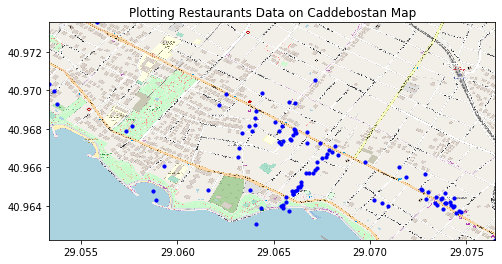

In [44]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(res_df[res_df['locality'] == 'Caddebostan']['longitude'],
           res_df[res_df['locality'] == 'Caddebostan']['latitude'],
           zorder=1, c='b', s=10)

ax.set_title('Plotting Restaurants Data on Caddebostan Map')
ax.set_xlim(BBox_c[0],BBox_c[1])
ax.set_ylim(BBox_c[2],BBox_c[3])
ax.imshow(map_c, zorder=0, extent = BBox_c, aspect= 'equal')

In [45]:
BBox_n = (res_df[res_df['locality'] == 'Nişantaşı']['longitude'].min(),
          res_df[res_df['locality'] == 'Nişantaşı']['longitude'].max(),
          res_df[res_df['locality'] == 'Nişantaşı']['latitude'].min(),
          res_df[res_df['locality'] == 'Nişantaşı']['latitude'].max())
BBox_n

(28.9879015088, 28.9975212514, 41.0472178741, 41.0549669101)

In [46]:
map_n = plt.imread('/Users/nilaykamar/PycharmProjects/Term_Project/map-2.png')

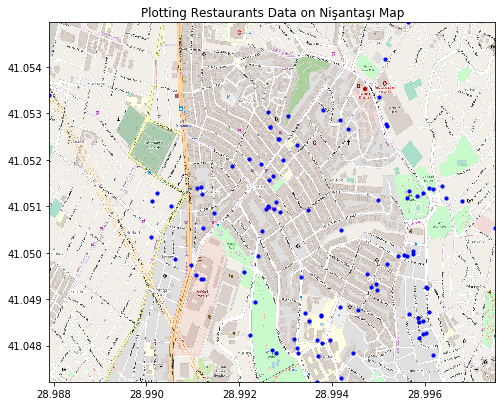

In [47]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(res_df[res_df['locality'] == 'Nişantaşı']['longitude'],
           res_df[res_df['locality'] == 'Nişantaşı']['latitude'],
           zorder=1, c='b', s=10)

ax.set_title('Plotting Restaurants Data on Nişantaşı Map')
ax.set_xlim(BBox_n[0],BBox_n[1])
ax.set_ylim(BBox_n[2],BBox_n[3])
ax.imshow(map_n, zorder=0, extent = BBox_n, aspect= 'equal')

## Where should you go at Nisantası?

In [48]:
res_n = res_df[res_df['locality'] == 'Nişantaşı']
res_n.iloc[res_n.groupby('establishment')['aggregate_rating'].agg(pd.Series.idxmax)].sort_values(by='aggregate_rating', ascending=False)

res_id                          name   locality   latitude  longitude  \
43  18811457           SAM Kitchen and Bar  Nişantaşı  41.048118  28.993679   
0   17975067                      Kruvasan  Nişantaşı  41.049968  28.995746   
40   5914937            La Vita Patisserie  Nişantaşı  41.052714  28.992656   
2   18135204     Hümaliva Çikolata & Kahve  Nişantaşı  41.053077  28.993801   
8    5927161    Spago - St. Regis İstanbul  Nişantaşı  41.047848  28.992785   
45   5914665  Topağacı Lokantası | Meyhane  Nişantaşı  41.051389  28.996089   
35   5917447             Nişantaşı Başköşe  Nişantaşı  41.047218  28.993683   
47  18799338                    The Grungy  Nişantaşı  41.047787  28.996171   
88  18206787                        Efendi  Nişantaşı  41.051325  28.995669   
50   5902402                     Karafırın  Nişantaşı  41.052702  28.992664   

      establishment  all_reviews_count  aggregate_rating rating_text  \
43    Casual Dining                 75               4.7   Excellent   
0              Café                249               4.6   Excellent   
40       Patisserie                 98               4.6   Excellent   
2   Dessert Parlour                227               4.5   Excellent   
8       Fine Dining                173               4.4   Very Good   
45          Meyhane                 65               4.4   Very Good   
35         Ocakbaşı                139               4.4   Very Good   
47      Quick Bites                 72               4.4   Very Good   
88              Bar                 36               4.0   Very Good   
50           Bakery                103               3.9        Good   

   rating_color  votes  photo_count  average_cost_for_two  
43       3F7E00    139          102                   250  
0        3F7E00    533          313                    90  
40       3F7E00    179          203                    55  
2        3F7E00    435          318                    70  
8        5BA829    400          323                   500  
45       5BA829    112           88                   300  
35       5BA829    271          435                   360  
47       5BA829    164           37                   100  
88       5BA829     71           38                   180  
50       9ACD32    163          211                    80

## Where should you go at Caddebostan?

In [49]:
res_c = res_df[res_df['locality'] == 'Caddebostan']
res_c.loc[res_c.groupby('establishment')['aggregate_rating'].agg(pd.Series.idxmax)].sort_values(by='aggregate_rating', ascending=False)

res_id                      name     locality   latitude  longitude  \
101.0   5927248                     Draft  Caddebostan  40.964030  29.074197   
134.0   5906446        Girandola Dondurma  Caddebostan  40.965694  29.066830   
100.0  19037132  Coffee House Mad Kitchen  Caddebostan  40.967493  29.065830   
108.0   5907442         Brasserie Polonez  Caddebostan  40.967827  29.066721   
144.0   5905959          Divan Patisserie  Caddebostan  40.964833  29.072681   
124.0   5926140              Burrito Shop  Caddebostan  40.967768  29.066135   
146.0  18209146            Saloon Sheriff  Caddebostan  40.963916  29.065508   
186.0   5923342  Tarihi Safranbolu Fırını  Caddebostan  40.970512  29.067140   
147.0  19005655                Adı Şahane  Caddebostan  40.964033  29.065476   
188.0  19067798    Kebabçı Şenol Ocakbaşı  Caddebostan  40.965722  29.067025   
192.0   5917654                Voice Club  Caddebostan  40.964623  29.065987   

         establishment  all_reviews_count  aggregate_rating rating_text  \
101.0              Pub                  0               4.7   Excellent   
134.0  Dessert Parlour                 92               4.6   Excellent   
100.0             Café                  0               4.5      Harika   
108.0    Casual Dining                360               4.5      Harika   
144.0       Patisserie                 44               4.2   Very Good   
124.0      Quick Bites                120               4.1   Very Good   
146.0              Bar                 50               3.9        Good   
186.0           Bakery                 14               3.8        Good   
147.0          Meyhane                 42               3.8        Good   
188.0         Ocakbaşı                 16               2.7     Average   
192.0             Club                 20               2.6     Average   

      rating_color  votes  photo_count  average_cost_for_two  
101.0       3F7E00   1004          406                   230  
134.0       3F7E00    133          112                    55  
100.0       3F7E00    303          118                   100  
108.0       3F7E00    621          501                   210  
144.0       5BA829     72           64                   100  
124.0       5BA829    192          145                   100  
146.0       9ACD32     91           27                   190  
186.0       9ACD32     22           29                    40  
147.0       9ACD32     68            9                   350  
188.0       FFBA00     31           19                   230  
192.0       FFBA00     29            6                   230

## Results

While I examined Zomato dataset, it can be got out results below:

 - Restaurants have a higher price at Nisantası than Caddebostan.
 - Many restaurants have similar features such as credit cards, cash, air conditioned, or indoor/outdoor settings.
 - Popular eating trends start to form restaurant features such as vegan options, gluten-free, or organic food. Nisantası is more sensitive to popular eating trends.
 - Disparately, Japanese cuisines have a rising trend at Nisantası compare to Caddebostan.
 
I also learned that:

 - Working with JSON files after got the data via API
 - Cleaning dataset
 - Plotting different types of graphs
 - Interpreting heat maps
 - Visualizing results
 - Comparing two different categories according to features